<a href="https://colab.research.google.com/github/databyhuseyn/DeepLearning/blob/main/Introduction_to_NLP_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/databyhuseyn/DeepLearning/main/helper_functions.py

--2024-05-29 10:23:54--  https://raw.githubusercontent.com/databyhuseyn/DeepLearning/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-05-29 10:23:54 (92.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import unzip_data, walk_through_dir, plot_loss_curves, create_tensorboard_callback, compare_historys

In [ ]:
# Download data
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# Unzip data
unzip_data("nlp_getting_started.zip")

--2024-05-29 10:24:00--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.207, 74.125.135.207, 74.125.142.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.007s  

2024-05-29 10:24:00 (86.9 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [ ]:
# Turn .csv files into pandas DataFrame's
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
# Shuffle train dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42)      # frac returns percentage     # sample shuffles dataset and frac tells how many percents to shuffle
train_df_shuffled

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0
...,...,...,...,...,...
5226,7470,obliteration,Merica!,@Eganator2000 There aren't many Obliteration s...,0
5390,7691,panic,NaN,just had a panic attack bc I don't have enough...,0
860,1242,blood,NaN,Omron HEM-712C Automatic Blood Pressure Monito...,0
7603,10862,NaN,NaN,Officials say a quarantine is in place at an A...,1


In [ ]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
# How many examples of each class?
train_df.target.value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [ ]:
print(f'Total training samples: {len(train_df)}')
print(f'Total test samples: {len(test_df)}')
print(f'Total samples: {len(train_df) + len(test_df)}')

Total training samples: 7613
Total test samples: 3263
Total samples: 10876


In [ ]:
import random
random_index = random.randint(0, len(train_df)-5)
for row in train_df_shuffled[['text', 'target']][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f'Target: {target}', '(real disaster)' if target > 0 else '(not real disaster)')
  print(f'Text:\n{text}\n')
  print('---\n')

Target: 1 (real disaster)
Text:
Man Currensy really be talkin that talk... I'd be more devastated if he had a ghostwriter than anybody else....

---

Target: 0 (not real disaster)
Text:
If itÛªs a war you came to see you will never see a waved white flag in front me.
I canÛªt end up dead I wont be misled.

---

Target: 0 (not real disaster)
Text:
I'm so traumatised.

---

Target: 0 (not real disaster)
Text:
@FurTrix then find cougars who look like her even better if they're in military uniform!

---

Target: 1 (real disaster)
Text:
Photos: Typhoon Soudelor Has Its Aim Set on Taiwan andåÊChina http://t.co/3OG66NfSIG

---



In [ ]:
from sklearn.model_selection import train_test_split

train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled['text'].to_numpy(),
                                                                            train_df_shuffled['target'].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=42)

In [ ]:
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [ ]:
# View the first 10 training sentence and their labels
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization


text_vectorizer = TextVectorization(max_tokens=None,    # how many words in the vocabulary (all of the different words in your text)      en chox istifade olunan sozleri basha qoyur ve onlari tokenize edir     necheye beraber olsa o qeder ilk bashdan muxtelif sozleri tokenize edir, none qoymushuq ki butun sozleri chevirsin
                                    standardize='lower_and_strip_punctuation',  # how to process text             # hamisini balaca herflerle yazir meselen (standartlashdirmaq uchun)
                                    split='whitespace',   # how to split tokens                           # her bir sozu whitespace ile bolsun
                                    ngrams=None,          # create groups of n-words?
                                    output_mode='int',    # how to map tokens to numbers              reqem formatinda cixarsin
                                    output_sequence_length=None)    # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True)       # Not valid if using max_tokens=None    # mes cumlede 20 soz olmalidi ve 10 soz varsa onda qalan 10 deneni '0' ile evez edir. output_sequence_length aktiv olanda ishe dushur

In [ ]:
round(sum([len(i.split()) for i in train_sentences]) / len(train_sentences))      # ortalama soz uzunlugunu tapiriq, chunki cumleler eyni uzunluqda olmalidi

15

Now let's create another TextVectorization object using our custom parameters.


In [ ]:
# Setup text vectorization with custom variables
max_vocab_length = 10000    # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)         # cumlelerin uzunlugunu qoyduq

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode='int',
                                    output_sequence_length=max_length)

In [ ]:
# Fit the vectorizer to the training text
text_vectorizer.adapt(train_sentences)            # fit yerine adapt ishledirik

In [ ]:
# Create sample sentence and tokenize it
sample_sentence = "My crocodile ate my friend"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  13,    1,    1,   13, 1020,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [ ]:
# Choose a random sentence from the training datast and tokenize it
random_sentence = random.choice(train_sentences)
print(f'Original text:\n{random_sentence}\
      n\nVectorized version:')
text_vectorizer([random_sentence])

Original text:
Audio: 16 Business Owners Share What They Would Do Differently Pt1 http://t.co/9uTqe9ZfDE      n
Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[1898, 1098,  691, 2363, 1175,   55,   64,   78,   68,    1, 9497,
           1,    0,    0,    0]])>

uzunlugu 15 teyin etmishik deye qalan bosh yerlere 0-lar elave edir

In [ ]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()         # hansi sozleri oyrenib baxmaq uchun
top_5_words = words_in_vocab[:5]   # most common tokens (notice the [UNK] token for 'unknown' words)
bottom_5_words = words_in_vocab[-5:]    # least common tokens
print(f'Number of words in vocab: {len(words_in_vocab)}')
print(f'Top 5 most common words: {top_5_words}')
print(f'Bottom 5 least common words: {bottom_5_words}')

Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers
embedding = layers.Embedding(input_dim=max_vocab_length,          # set input shape
                             output_dim=128,                      # set size of embedding vector          # her soz uchun 128 deyerden ibaret metrice yaradir
                             embeddings_initializer='uniform',    # default, initialize randomly
                             input_length=max_length,             # how long is each input
                             name='embedding_1')
embedding                                                               # embedding creates matrices from the words. They behave like layers and they can learn their meanings from their using place and etc.

In [ ]:
# Get a random sentence from training set
random_sentence = random.choice(train_sentences)
print(f'Original text:\n{random_sentence}\
      \n\nEmbedded version:')
# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
Rocky fire in Northern California swells to 60000 acres; 12000 evacuated http://t.co/mtfnbhRYZq Portland #Phoenix #Miami #Atlanta #Casper      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.0466543 , -0.02404456, -0.00903959, ..., -0.01244161,
          0.04490402,  0.0324456 ],
        [-0.03891002, -0.03396656, -0.01161822, ..., -0.03227379,
         -0.00457174,  0.04450637],
        [ 0.04212748,  0.01169442, -0.0253202 , ...,  0.0480555 ,
         -0.02420559, -0.01811582],
        ...,
        [-0.03445597, -0.04956083, -0.04484224, ...,  0.03609005,
          0.00428839, -0.00533378],
        [ 0.02808055,  0.0060725 ,  0.00617772, ...,  0.0156795 ,
         -0.03302439, -0.00260619],
        [ 0.03275   , -0.03959162,  0.01253109, ...,  0.0288625 ,
         -0.01729093,  0.02480883]]], dtype=float32)>

In [ ]:
sample_embed[0][0]                # meselen bu 1 sozdu toplamda (meselen salam sozu)

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 0.0466543 , -0.02404456, -0.00903959, -0.04027315, -0.03469121,
        0.03761336,  0.00707213, -0.00163538, -0.04416195, -0.04644468,
        0.00057422,  0.04336273, -0.00149646,  0.02737397,  0.01821006,
       -0.04864589, -0.03145968, -0.01967704, -0.04867666, -0.04573324,
       -0.02384984,  0.01972932,  0.00528867, -0.02178189, -0.04197222,
        0.00374971, -0.04576358, -0.01990722,  0.0074225 , -0.03009   ,
       -0.03074304, -0.02088848, -0.04690854,  0.00655379,  0.01195542,
        0.03864655, -0.04094862,  0.02183897,  0.03473928,  0.02122768,
        0.01541707,  0.01343124, -0.02412192, -0.01817775,  0.04195242,
       -0.0129074 ,  0.01183493, -0.04056688, -0.01046836,  0.03485015,
       -0.02347016,  0.02457472,  0.03697569, -0.00568136,  0.00094711,
       -0.00056316, -0.03261298, -0.04034618, -0.01849345, -0.04063882,
       -0.04689831, -0.04390223,  0.04194685, -0.00528758,  0.02518275,
        0.002749

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB         # Elaqelere baxmir, tekce probabilityleri yoxlayir
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
    ('tfidf', TfidfVectorizer()),     # convert words to number using tfidf
    ('clf', MultinomialNB())          # model the text
])

# Fit the pipeline to the training data
model_0_history = model_0.fit(train_sentences, train_labels)

In [ ]:
baseline_score = model_0.score(val_sentences, val_labels)
print(f'Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%')

Our baseline model achieves an accuracy of: 79.27%


In [ ]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
model_0.predict(["earthquake didn't happen"])     # earthquake sozunu goren kimi Naive Bayes olduguna gore, aradaki elaqelere baxmir buna gore sehv chixarir

array([1])

# Creating an evaluation function for our model experiments

we could evaluate these as they are but since we're going to be evaluating several models in the same way going forward, let's create a helper function which takes an array of predictions and ground truth labels and computes the following



*   Accuracy
*   Precision
*   Recall
*   F1-score



In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
  model_results = {'accuracy': model_accuracy,
                   'precision': model_precision,
                   'recall': model_recall,
                   'f1': model_f1}
  return model_results

In [ ]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                    y_pred=baseline_preds)
baseline_results                                                          # ish muhitinde olan bir haldi, baseline model duzeldirik ve onu kechmeye chalishiriq

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

# Model_1: A simple dense model

In [ ]:
from helper_functions import create_tensorboard_callback

SAVE_DIR = 'model_logs'

In [ ]:
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_1 = tf.keras.Model(inputs, outputs, name='model_1_dense')

In [ ]:
# Compile model
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
# Get a summary of the model
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [ ]:
# Fit the model
model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='simple_dense_model')])

Saving TensorBoard log files to: model_logs/simple_dense_model/20240529-102409
Epoch 1/5
215/215 [==============================] - 21s 67ms/step - loss: 0.6105 - accuracy: 0.6929 - val_loss: 0.5365 - val_accuracy: 0.7585
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.4414 - accuracy: 0.8186 - val_loss: 0.4695 - val_accuracy: 0.7822
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3466 - accuracy: 0.8603 - val_loss: 0.4594 - val_accuracy: 0.7900
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.2852 - accuracy: 0.8913 - val_loss: 0.4644 - val_accuracy: 0.7874
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.2384 - accuracy: 0.9118 - val_loss: 0.4769 - val_accuracy: 0.7887


In [ ]:
from helper_functions import plot_loss_curves

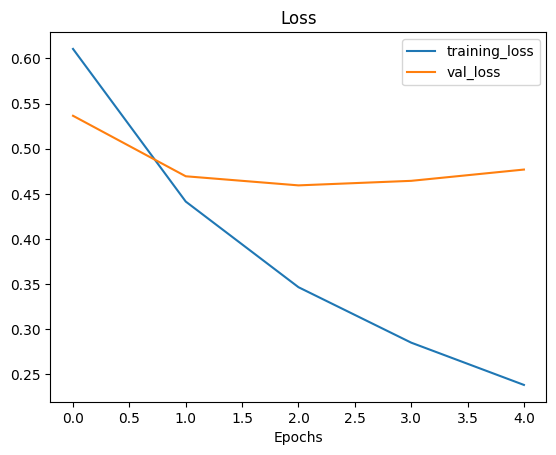

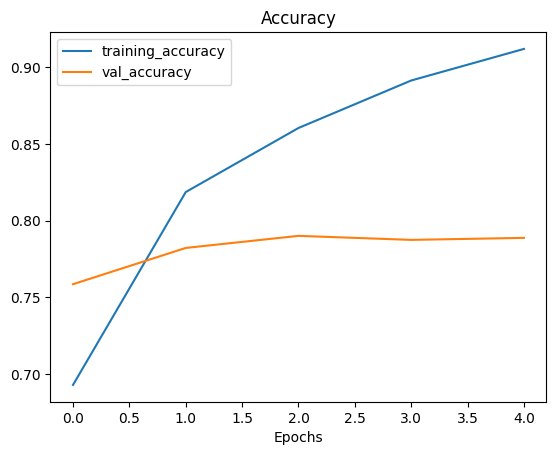

In [ ]:
plot_loss_curves(model_1_history)

In [ ]:
# Check the results
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 4ms/step - loss: 0.4769 - accuracy: 0.7887


[0.4769059717655182, 0.7887139320373535]

In [ ]:
embedding.weights

[<tf.Variable 'embedding_1/embeddings:0' shape=(10000, 128) dtype=float32, numpy=
 array([[-0.02018371, -0.00631251,  0.06749693, ...,  0.06840414,
         -0.00347075, -0.01414607],
        [-0.01471773,  0.01963124,  0.0126532 , ...,  0.00627301,
         -0.02183698,  0.01772429],
        [ 0.00437653,  0.00323085,  0.06785766, ..., -0.01822371,
          0.061894  ,  0.0623723 ],
        ...,
        [-0.02990261,  0.04955696,  0.04646449, ...,  0.02724863,
          0.00747472, -0.01207205],
        [-0.00999382,  0.04736453,  0.03088928, ...,  0.03899022,
          0.02879099,  0.0126883 ],
        [-0.06332503,  0.03966286,  0.09367755, ...,  0.08689879,
          0.03344368,  0.01601718]], dtype=float32)>]

In [ ]:
embed_weights = model_1.get_layer('embedding_1').get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [ ]:
# Make predictions (these come back in the form of probablities)

model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10]   # Only print first 10 predictions of model

24/24 [==============================] - 0s 3ms/step


array([[0.41966313],
       [0.74533767],
       [0.99777454],
       [0.10826685],
       [0.11634924],
       [0.93592364],
       [0.9167106 ],
       [0.9931827 ],
       [0.96862215],
       [0.2659463 ]], dtype=float32)

In [ ]:
# Turn predictions probablities into single-dimension
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))      # squeeze removes single dimensions
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

Now we've got our model's predictions in the form of classes, we can use our calculate_results() function to compare them to the ground truth validation labels.

In [ ]:
# Calculate model_1 metrics
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 78.87139107611549,
 'precision': 0.7930566476728028,
 'recall': 0.7887139107611548,
 'f1': 0.7859560656123432}

How about we compare first deep model to our baseline model?

In [ ]:
# Is our simple Keras model better than our baseline model?
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

Since we'll be doing this kind of comparison (baseline compared to new model) quite a few times, let's create a function to help us out.

In [ ]:
# Create a helper function to compare our baseline results to new model results
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f'Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key] - value:.2f}')

compare_baseline_to_new_results(baseline_results=baseline_results,
                                new_model_results=model_1_results)

Baseline accuracy: 79.27, New accuracy: 78.87, Difference: -0.39
Baseline precision: 0.81, New precision: 0.79, Difference: -0.02
Baseline recall: 0.79, New recall: 0.79, Difference: -0.00
Baseline f1: 0.79, New f1: 0.79, Difference: -0.00


# Visualizing learned embeddings

In [ ]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [ ]:
# Get the weight matrix of embedding layer
embed_weights = model_1.get_layer('embedding_1').get_weights()[0]
print(embed_weights.shape)

(10000, 128)


http://projector.tensorflow.org/ to visualize

In [ ]:
# Code below is adapted from: https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk
import io

# Create output writers
out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# Write embedding vectors and words to file
for num, word in enumerate(words_in_vocab):
  if num == 0:
     continue # skip padding token
  vec = embed_weights[num]
  out_m.write(word + "\n") # write words to file
  out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
out_v.close()
out_m.close()

# Download files locally to upload to Embedding Projector
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download("embedding_vectors.tsv")
  files.download("embedding_metadata.tsv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Model_2

In [ ]:
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(50, input_shape=(1,), activation='relu', kernel_initializer="he_normal")(x)
# x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_2 = tf.keras.Model(inputs, outputs, name='model_2_dense')

In [ ]:
model_2.summary()

Model: "model_2_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 50)                35800     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1315851 (5.02 MB)
Trainable params: 1315851 (5.02 MB)
Non-trainable params: 0 (0.00 Byte)
_______________

In [ ]:
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                metrics=['accuracy'])

In [ ]:
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='simple_dense_model')])

Saving TensorBoard log files to: model_logs/simple_dense_model/20240529-102443
Epoch 1/5
215/215 [==============================] - 14s 54ms/step - loss: 0.2765 - accuracy: 0.8997 - val_loss: 0.6122 - val_accuracy: 0.7822
Epoch 2/5
215/215 [==============================] - 6s 26ms/step - loss: 0.1716 - accuracy: 0.9352 - val_loss: 0.7605 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 7s 31ms/step - loss: 0.1331 - accuracy: 0.9477 - val_loss: 0.9253 - val_accuracy: 0.7743
Epoch 4/5
215/215 [==============================] - 5s 24ms/step - loss: 0.1084 - accuracy: 0.9575 - val_loss: 1.0167 - val_accuracy: 0.7795
Epoch 5/5
215/215 [==============================] - 7s 31ms/step - loss: 0.0860 - accuracy: 0.9650 - val_loss: 1.2434 - val_accuracy: 0.7756


# Model_3

In [ ]:
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(50, input_shape=(1,), activation='relu', kernel_initializer="he_normal")(x)
# x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_3 = tf.keras.Model(inputs, outputs, name='model_2_dense')


In [ ]:
model_3.summary()

Model: "model_2_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 50)                27000     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1307051 (4.99 MB)
Trainable params: 1307051 (4.99 MB)
Non-trainable params: 0 (0.00 Byte)
_______________

In [ ]:
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                metrics=['accuracy'])

In [ ]:
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='simple_dense_model')])

Saving TensorBoard log files to: model_logs/simple_dense_model/20240529-102525
Epoch 1/5
215/215 [==============================] - 18s 73ms/step - loss: 0.1969 - accuracy: 0.9167 - val_loss: 0.7724 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 22s 102ms/step - loss: 0.0877 - accuracy: 0.9666 - val_loss: 0.9621 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 18s 82ms/step - loss: 0.0680 - accuracy: 0.9718 - val_loss: 1.4200 - val_accuracy: 0.7690
Epoch 4/5
215/215 [==============================] - 10s 45ms/step - loss: 0.0613 - accuracy: 0.9747 - val_loss: 1.3834 - val_accuracy: 0.7756
Epoch 5/5
215/215 [==============================] - 7s 33ms/step - loss: 0.0536 - accuracy: 0.9761 - val_loss: 1.4343 - val_accuracy: 0.7703


In [ ]:
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs.shape, model_3_pred_probs[:10]

24/24 [==============================] - 0s 8ms/step


((762, 1),
 array([[1.9051579e-01],
        [8.7496245e-01],
        [9.9995601e-01],
        [1.1847486e-01],
        [4.0200143e-06],
        [9.9998868e-01],
        [7.0880932e-01],
        [1.0000000e+00],
        [9.9999976e-01],
        [7.7202201e-01]], dtype=float32))

In [ ]:
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 77.03412073490814,
 'precision': 0.7699875340682781,
 'recall': 0.7703412073490814,
 'f1': 0.7700027422013553}

In [ ]:
# Compare model 3 to baseline
compare_baseline_to_new_results(baseline_results, model_3_results)

Baseline accuracy: 79.27, New accuracy: 77.03, Difference: -2.23
Baseline precision: 0.81, New precision: 0.77, Difference: -0.04
Baseline recall: 0.79, New recall: 0.77, Difference: -0.02
Baseline f1: 0.79, New f1: 0.77, Difference: -0.02


# Model_4: LSTM

In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_4_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer='uniform',
                                     input_length=max_length,
                                     name='embedding_2')

# Create LSTM model
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = model_4_embedding(x)
print(x.shape)

x = layers.LSTM(64)(x)
print(x.shape)

outputs = layers.Dense(1, activation='sigmoid')(x)
model_4 = tf.keras.Model(inputs, outputs, name='model_2_LSTM')

(None, 15, 128)
(None, 64)


In [ ]:
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

In [ ]:
model_4.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_2 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329473 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='simple_dense_model')])

Saving TensorBoard log files to: model_logs/simple_dense_model/20240529-102640
Epoch 1/5
215/215 [==============================] - 9s 31ms/step - loss: 0.5106 - accuracy: 0.7451 - val_loss: 0.4547 - val_accuracy: 0.7756
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3176 - accuracy: 0.8708 - val_loss: 0.5121 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.2206 - accuracy: 0.9161 - val_loss: 0.5713 - val_accuracy: 0.7690
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1547 - accuracy: 0.9454 - val_loss: 0.6446 - val_accuracy: 0.7782
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1087 - accuracy: 0.9593 - val_loss: 0.7621 - val_accuracy: 0.7743


# Model 5

In [ ]:
model_5_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer='uniform',
                                     input_length=max_length,
                                     name='embedding_2')

In [ ]:
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = model_5_embedding(x)
x = layers.LSTM(64, return_sequences = True, kernel_regularizer='l2')(x)
x = layers.LSTM(64, return_sequences = True, kernel_regularizer='l2')(x)
x = layers.LSTM(64)(x)
x = layers.Dropout(rate=0.2)(x)
x = layers.Dense(64, activation='relu', kernel_initializer='he_normal', kernel_regularizer='l2')(x)
x = layers.Dropout(rate=0.2)(x)
x = layers.Dense(32, activation='relu', kernel_initializer='he_normal', kernel_regularizer='l2')(x)
x = layers.Dropout(rate=0.2)(x)
x = layers.Dense(8, activation='relu', kernel_initializer='he_normal', kernel_regularizer='l2')(x)
outputs = layers.Dense(1, activation='sigmoid', kernel_regularizer='l2')(x)
model_5 = tf.keras.Model(inputs, outputs, name='model_3_LSTM')

In [ ]:
model_5.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics='accuracy')

In [ ]:
model_5.summary()

Model: "model_3_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_2 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm_2 (LSTM)               (None, 15, 64)            49408     
                                                                 
 lstm_3 (LSTM)               (None, 15, 64)            33024     
                                                                 
 lstm_4 (LSTM)               (None, 64)                33024     
                                                      

In [ ]:
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='simple_dense_model')])

Saving TensorBoard log files to: model_logs/simple_dense_model/20240529-102703
Epoch 1/5
215/215 [==============================] - 17s 43ms/step - loss: 2.0277 - accuracy: 0.7019 - val_loss: 0.8492 - val_accuracy: 0.7533
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.5817 - accuracy: 0.8508 - val_loss: 0.6382 - val_accuracy: 0.7651
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3719 - accuracy: 0.8999 - val_loss: 0.6822 - val_accuracy: 0.7664
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.2986 - accuracy: 0.9282 - val_loss: 0.6290 - val_accuracy: 0.7585
Epoch 5/5
215/215 [==============================] - 4s 20ms/step - loss: 0.2576 - accuracy: 0.9422 - val_loss: 0.6966 - val_accuracy: 0.7625


# Model_6

In [ ]:
model_6_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=1,
                                     embeddings_initializer='uniform',
                                     input_length=max_length,
                                     name='embedding_2')

In [ ]:
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = model_6_embedding(x)
x = layers.LSTM(1, kernel_regularizer='l2')(x)
outputs = layers.Dense(1, activation='sigmoid', kernel_regularizer='l2')(x)
model_6 = tf.keras.Model(inputs, outputs, name='model_6_LSTM')

In [ ]:
model_6.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics='accuracy')

In [ ]:
model_6.summary()

Model: "model_6_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_2 (Embedding)     (None, 15, 1)             10000     
                                                                 
 lstm_5 (LSTM)               (None, 1)                 12        
                                                                 
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 10014 (39.12 KB)
Trainable params: 10014 (39.12 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [ ]:
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='simple_dense_model')])

Saving TensorBoard log files to: model_logs/simple_dense_model/20240529-102734
Epoch 1/5
215/215 [==============================] - 14s 54ms/step - loss: 0.7056 - accuracy: 0.5735 - val_loss: 0.7008 - val_accuracy: 0.5433
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.6508 - accuracy: 0.6383 - val_loss: 0.6166 - val_accuracy: 0.7585
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.5479 - accuracy: 0.8202 - val_loss: 0.5802 - val_accuracy: 0.7651
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.4849 - accuracy: 0.8555 - val_loss: 0.5734 - val_accuracy: 0.7651
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4382 - accuracy: 0.8803 - val_loss: 0.5736 - val_accuracy: 0.7651


# GRU - Gated Recurrent Unit

GRU tries to learn context of words instead of sequence

In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_7_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer='uniform',
                                     input_length=max_length,
                                     name='embedding_7')

# Build an RNN using GRU cell
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = model_7_embedding(x)
x = layers.GRU(64)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_7 = tf.keras.Model(inputs, outputs, name='model_7_GRU')

In [ ]:
model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

In [ ]:
model_7.summary()

Model: "model_7_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_7 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru_1 (GRU)                 (None, 64)                37248     
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1317313 (5.03 MB)
Trainable params: 1317313 (5.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [ ]:
model_7_history = model_7.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='simple_dense_model')])

Saving TensorBoard log files to: model_logs/simple_dense_model/20240529-102817
Epoch 1/5
215/215 [==============================] - 10s 37ms/step - loss: 0.5257 - accuracy: 0.7307 - val_loss: 0.4529 - val_accuracy: 0.7822
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3184 - accuracy: 0.8711 - val_loss: 0.4900 - val_accuracy: 0.7795
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.2179 - accuracy: 0.9167 - val_loss: 0.5626 - val_accuracy: 0.7743
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1539 - accuracy: 0.9469 - val_loss: 0.6279 - val_accuracy: 0.7782
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.1171 - accuracy: 0.9606 - val_loss: 0.6023 - val_accuracy: 0.7703


In [ ]:
from helper_functions import plot_loss_curves

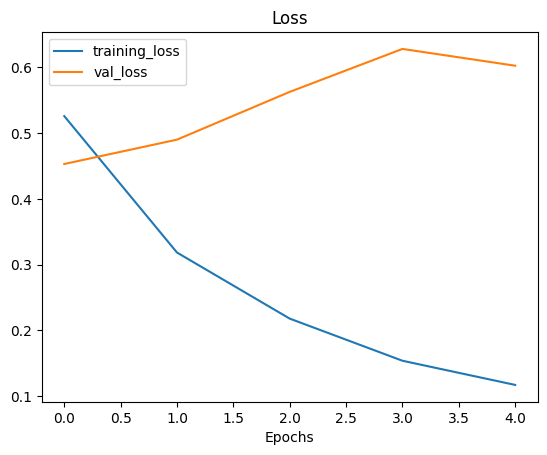

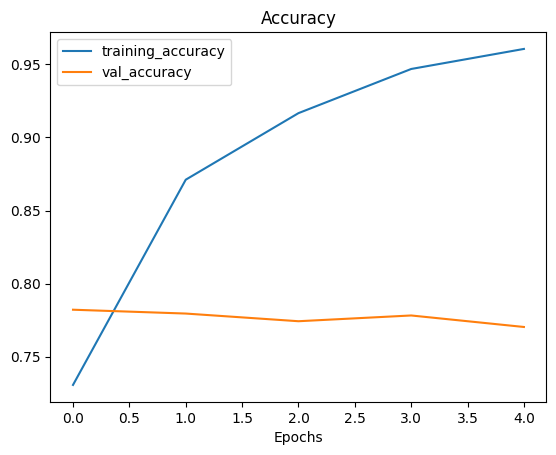

In [ ]:
plot_loss_curves(model_7_history)

# Model 8: Bidirectional LSTM model

Since it reads sentences from left to right, then right to left, it will improve result

In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_8_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer='uniform',
                                     input_length=max_length,
                                     name='embedding_8')

# Building a Bidirectional LSTM in TensorFlow
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = model_8_embedding(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_8 = tf.keras.Model(inputs, outputs, name='model_8_Bidirectional')

In [ ]:
model_8.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

In [ ]:
model_8.summary()

Model: "model_8_Bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_8 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirection  (None, 128)               98816     
 al)                                                             
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1378945 (5.26 MB)
Trainable par

In [ ]:
model_8_history = model_8.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='simple_dense_model')])

Saving TensorBoard log files to: model_logs/simple_dense_model/20240529-102841
Epoch 1/5
215/215 [==============================] - 12s 39ms/step - loss: 0.5128 - accuracy: 0.7422 - val_loss: 0.4584 - val_accuracy: 0.7808
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3151 - accuracy: 0.8688 - val_loss: 0.5132 - val_accuracy: 0.7730
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.2152 - accuracy: 0.9184 - val_loss: 0.5584 - val_accuracy: 0.7690
Epoch 4/5
215/215 [==============================] - 2s 12ms/step - loss: 0.1518 - accuracy: 0.9499 - val_loss: 0.6424 - val_accuracy: 0.7808
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.1107 - accuracy: 0.9634 - val_loss: 0.6623 - val_accuracy: 0.7651


In [ ]:
model_8_pred_props = model_8.predict(val_sentences)
model_8_pred_props[:20]

24/24 [==============================] - 1s 3ms/step


array([[0.29724067],
       [0.9555187 ],
       [0.9994824 ],
       [0.22132717],
       [0.0136146 ],
       [0.99354   ],
       [0.9884399 ],
       [0.9996137 ],
       [0.9996086 ],
       [0.37414545],
       [0.01369733],
       [0.77341   ],
       [0.00690963],
       [0.12068671],
       [0.00520958],
       [0.20847301],
       [0.01123634],
       [0.0095922 ],
       [0.28516552],
       [0.97655076]], dtype=float32)

In [ ]:
model_8_preds = tf.squeeze(tf.round(model_8_pred_props))
model_8_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_8_results = calculate_results(val_labels, model_8_preds)
model_8_results

{'accuracy': 76.50918635170603,
 'precision': 0.7648043600988953,
 'recall': 0.7650918635170604,
 'f1': 0.7648832159800715}

In [ ]:
compare_baseline_to_new_results(baseline_results, model_8_results)

Baseline accuracy: 79.27, New accuracy: 76.51, Difference: -2.76
Baseline precision: 0.81, New precision: 0.76, Difference: -0.05
Baseline recall: 0.79, New recall: 0.77, Difference: -0.03
Baseline f1: 0.79, New f1: 0.76, Difference: -0.02


# Convolutional Neural Netrowks for Text

# Model 9: Conv1D

In [ ]:
# test out the embedding, 1D convolutional and max pooling

embedding_test = embedding(text_vectorizer(['this is a test sentence']))      # turn target sentence into embedding
conv_1d = layers.Conv1D(filters=32, kernel_size=5, activation='relu')         # convolve over target sequence 5 words at a time
conv_1d_output = conv_1d(embedding_test)                                      # pass embedding through 1D convolutional layer
max_pool = layers.GlobalMaxPooling1D()
max_pool_output = max_pool(conv_1d_output)                                    # get the most important features
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [ ]:
# See the output of each layer
embedding_test[:1], conv_1d_output[:1], max_pool_output[:1]

(<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
 array([[[ 0.01492911,  0.00308572,  0.01646813, ..., -0.10012239,
          -0.10100883,  0.08107843],
         [-0.07953472,  0.05601864,  0.08442762, ...,  0.01192506,
          -0.01454414,  0.03686076],
         [ 0.00522514,  0.0536762 ,  0.08234452, ...,  0.02690062,
          -0.06889011,  0.09074764],
         ...,
         [-0.03366736,  0.00044082,  0.081495  , ...,  0.04450397,
          -0.05925005,  0.00664393],
         [-0.03366736,  0.00044082,  0.081495  , ...,  0.04450397,
          -0.05925005,  0.00664393],
         [-0.03366736,  0.00044082,  0.081495  , ...,  0.04450397,
          -0.05925005,  0.00664393]]], dtype=float32)>,
 <tf.Tensor: shape=(1, 11, 32), dtype=float32, numpy=
 array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.06961816, 0.        , 0.09383304, 0.00880256,
          0.0967176 , 0.02340633, 0.        , 0.        , 0.        ,
          0.        , 0.

In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_9_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer='uniform',
                                     input_length=max_length,
                                     name='embedding_9')

# Create 1-dimensional convolutional layer to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = model_9_embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation='relu')(x)
x = layers.GlobalMaxPooling1D()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_9 = tf.keras.Model(inputs, outputs, name='model_9')

In [ ]:
model_9.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

In [ ]:
model_9_history = model_9.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='simple_dense_model')])

Saving TensorBoard log files to: model_logs/simple_dense_model/20240529-102904
Epoch 1/5
215/215 [==============================] - 8s 32ms/step - loss: 0.5661 - accuracy: 0.7152 - val_loss: 0.4725 - val_accuracy: 0.7835
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3431 - accuracy: 0.8599 - val_loss: 0.4753 - val_accuracy: 0.7953
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2142 - accuracy: 0.9216 - val_loss: 0.5409 - val_accuracy: 0.7651
Epoch 4/5
215/215 [==============================] - 1s 7ms/step - loss: 0.1364 - accuracy: 0.9559 - val_loss: 0.6177 - val_accuracy: 0.7677
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0953 - accuracy: 0.9693 - val_loss: 0.6777 - val_accuracy: 0.7835


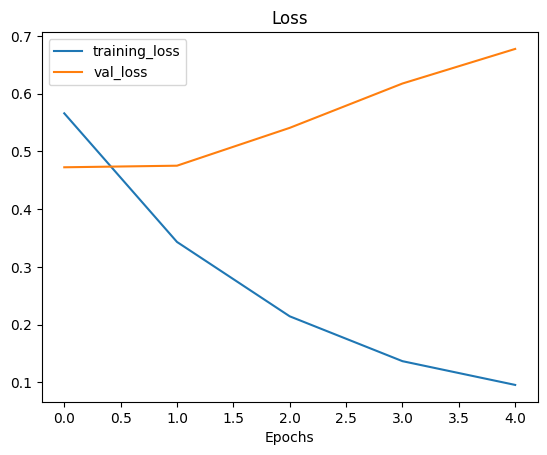

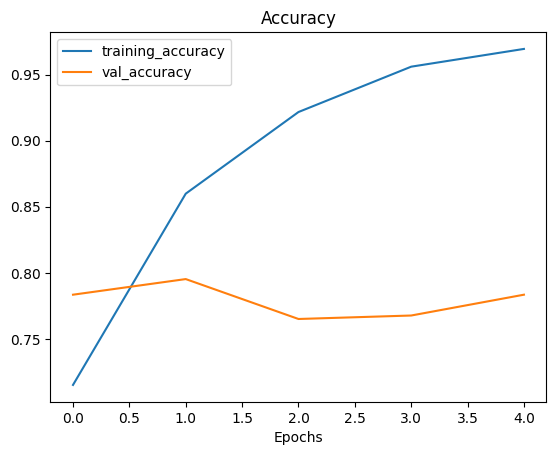

In [ ]:
plot_loss_curves(model_9_history)

In [ ]:
model_9_pred_probs = model_9.predict(val_sentences)
model_9_pred_probs[:10]

24/24 [==============================] - 0s 2ms/step


array([[0.78836316],
       [0.6732301 ],
       [0.9999536 ],
       [0.05409931],
       [0.0054245 ],
       [0.99510103],
       [0.9305021 ],
       [0.9977412 ],
       [0.99930465],
       [0.11614277]], dtype=float32)

In [ ]:
model_9_preds = tf.squeeze(tf.round(model_9_pred_probs))
model_9_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_9_results = calculate_results(val_labels, model_9_preds)
model_9_results

{'accuracy': 78.34645669291339,
 'precision': 0.7861644127328657,
 'recall': 0.7834645669291339,
 'f1': 0.7811856084066165}

In [ ]:
compare_baseline_to_new_results(baseline_results, model_9_results)

Baseline accuracy: 79.27, New accuracy: 78.35, Difference: -0.92
Baseline precision: 0.81, New precision: 0.79, Difference: -0.02
Baseline recall: 0.79, New recall: 0.78, Difference: -0.01
Baseline f1: 0.79, New f1: 0.78, Difference: -0.01


# Model 10: Tensorflow Hub Pretrained Pretrained Sentence Encoder

In [ ]:
import tensorflow_hub as hub
embed = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')     # Load Universal Sentence Encoder
embed_samples = embed([sample_sentence,
                       'When you call the universal sentence encoder on a sentence, it turns it into numbers.'])

print(embed_samples[0][:50])

tf.Tensor(
[-0.06707384  0.03364494 -0.02275401 -0.02425485 -0.01192328  0.01628205
 -0.03235815  0.01783345  0.06661483  0.04477837  0.06999726 -0.02266894
 -0.00878144  0.06721929 -0.08351798 -0.07105117 -0.01542228 -0.04401793
 -0.03126107 -0.05497772  0.02604343 -0.01635449 -0.00635866  0.06587313
  0.06001672 -0.01317355 -0.03445259 -0.05356695  0.03584114 -0.00513949
  0.04245306 -0.02069402 -0.03883396 -0.04442709 -0.0005941   0.01081553
 -0.0496508   0.01584988  0.02469967 -0.03801594  0.04846692 -0.03241457
  0.01838166  0.01607024 -0.08049509  0.05904468 -0.04780786  0.06529238
  0.04183917 -0.02303949], shape=(50,), dtype=float32)


In [ ]:
embed_samples[0].shape

TensorShape([512])

In [ ]:
sentence_encoder_layer = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name='USE')

In [ ]:
model_10 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
], name='model_10_USE')

model_10.compile(loss='binary_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics='accuracy')
model_10.summary()

Model: "model_10_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_12 (Dense)            (None, 64)                32832     
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
model_10_history = model_10.fit(train_sentences,
                                train_labels,
                                epochs=5,
                                validation_data=(val_sentences, val_labels),
                                callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='simple_dense_model')])

Saving TensorBoard log files to: model_logs/simple_dense_model/20240529-102949
Epoch 1/5
215/215 [==============================] - 7s 15ms/step - loss: 0.5050 - accuracy: 0.7840 - val_loss: 0.4495 - val_accuracy: 0.7979
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4150 - accuracy: 0.8129 - val_loss: 0.4382 - val_accuracy: 0.8071
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4003 - accuracy: 0.8213 - val_loss: 0.4334 - val_accuracy: 0.8097
Epoch 4/5
215/215 [==============================] - 2s 12ms/step - loss: 0.3929 - accuracy: 0.8259 - val_loss: 0.4291 - val_accuracy: 0.8110
Epoch 5/5
215/215 [==============================] - 4s 16ms/step - loss: 0.3864 - accuracy: 0.8289 - val_loss: 0.4309 - val_accuracy: 0.8150


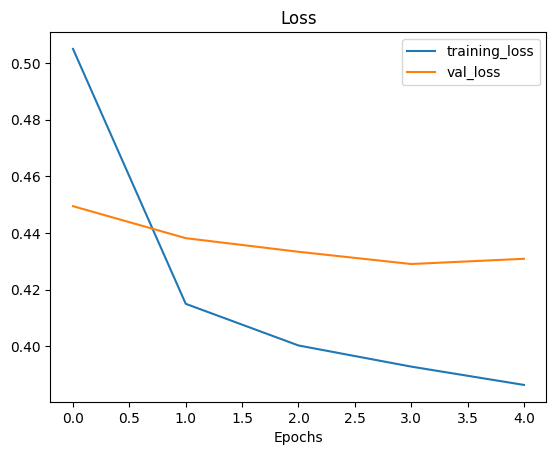

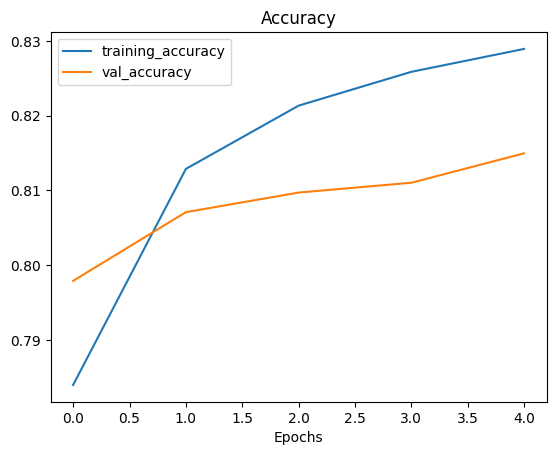

In [ ]:
plot_loss_curves(model_10_history)

In [ ]:
model_10_pred_props = model_10.predict(val_sentences)
model_10_pred_props[:10]

24/24 [==============================] - 1s 9ms/step


array([[0.1372622 ],
       [0.75752956],
       [0.9865563 ],
       [0.18681313],
       [0.72243726],
       [0.69004565],
       [0.97983724],
       [0.97639704],
       [0.92259616],
       [0.08916982]], dtype=float32)

In [ ]:
model_10_preds = tf.squeeze(tf.round(model_10_pred_props))
model_10_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_10_results = calculate_results(val_labels, model_10_preds)
model_10_results

{'accuracy': 81.49606299212599,
 'precision': 0.8179063565195398,
 'recall': 0.8149606299212598,
 'f1': 0.8132300658103407}

In [ ]:
# Compare TF Hub model to baseline
compare_baseline_to_new_results(baseline_results, model_10_results)

Baseline accuracy: 79.27, New accuracy: 81.50, Difference: 2.23
Baseline precision: 0.81, New precision: 0.82, Difference: 0.01
Baseline recall: 0.79, New recall: 0.81, Difference: 0.02
Baseline f1: 0.79, New f1: 0.81, Difference: 0.03


# Model 11: Tensorflow Hub Pretrained Sentence Encoder 10% of the training data

In [ ]:
train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(np.array(train_sentences),
                                                                                                                            train_labels,
                                                                                                                            test_size=0.1,
                                                                                                                            random_state=42)

In [ ]:
print(f'Total training examples: {len(train_sentences)}')
print(f'Length of 10% training examples: {len(train_sentences_10_percent)}')

Total training examples: 6851
Length of 10% training examples: 686


In [ ]:
pd.Series(train_labels_10_percent).value_counts()

0    415
1    271
Name: count, dtype: int64

In [ ]:
# Clone model_10 but reset weights
model_11 = tf.keras.models.clone_model(model_10)        # Clone model doesn't copy weights, but layers
                                                        # if you want to copy weights, you can use get_weights and set_weights
# Compile model_11
model_11.compile(loss='binary_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics='accuracy')

model_11.summary()

Model: "model_10_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_12 (Dense)            (None, 64)                32832     
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
model_11_history = model_11.fit(train_sentences_10_percent,
                                train_labels_10_percent,
                                epochs=5,
                                validation_data=(val_sentences, val_labels),
                                callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='simple_dense_model')])

Saving TensorBoard log files to: model_logs/simple_dense_model/20240529-103013
Epoch 1/5
22/22 [==============================] - 4s 80ms/step - loss: 0.6738 - accuracy: 0.6720 - val_loss: 0.6515 - val_accuracy: 0.7165
Epoch 2/5
22/22 [==============================] - 1s 36ms/step - loss: 0.5949 - accuracy: 0.8236 - val_loss: 0.5912 - val_accuracy: 0.7415
Epoch 3/5
22/22 [==============================] - 1s 26ms/step - loss: 0.5147 - accuracy: 0.8236 - val_loss: 0.5379 - val_accuracy: 0.7690
Epoch 4/5
22/22 [==============================] - 1s 25ms/step - loss: 0.4503 - accuracy: 0.8397 - val_loss: 0.5073 - val_accuracy: 0.7730
Epoch 5/5
22/22 [==============================] - 1s 26ms/step - loss: 0.4075 - accuracy: 0.8426 - val_loss: 0.4906 - val_accuracy: 0.7795


In [ ]:
model_11_pred_props = model_11.predict(val_sentences)
model_11_pred_props[:10]

24/24 [==============================] - 1s 8ms/step


array([[0.25650427],
       [0.8013713 ],
       [0.9128877 ],
       [0.3414514 ],
       [0.54391426],
       [0.851814  ],
       [0.80565083],
       [0.8507915 ],
       [0.8484509 ],
       [0.13869542]], dtype=float32)

In [ ]:
model_11_preds = tf.squeeze(tf.round(model_11_pred_props))
model_11_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_11_results = calculate_results(val_labels, model_11_preds)
model_11_results

{'accuracy': 77.95275590551181,
 'precision': 0.7854389051990907,
 'recall': 0.7795275590551181,
 'f1': 0.7759572947489844}

In [ ]:
# Compare TF Hub model to baseline
compare_baseline_to_new_results(baseline_results, model_11_results)

Baseline accuracy: 79.27, New accuracy: 77.95, Difference: -1.31
Baseline precision: 0.81, New precision: 0.79, Difference: -0.03
Baseline recall: 0.79, New recall: 0.78, Difference: -0.01
Baseline f1: 0.79, New f1: 0.78, Difference: -0.01


# Comparing the performance of each of our models

In [ ]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "simple_dense": model_1_results,
                                  #"lstm": model_2_results,
                                  "gru": model_3_results,
                                  #"bidirectional": model_4_results,
                                  #"conv1d": model_5_results,
                                  #"tf_hub_sentence_encoder": model_6_results,
                                  #"tf_hub_10_percent_data": model_7_results
                                  })
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,79.265092,0.811139,0.792651,0.786219
simple_dense,78.871391,0.793057,0.788714,0.785956
gru,77.034121,0.769988,0.770341,0.770003


In [ ]:
# Reduce the accuracy to same scale as other metrics
all_model_results['accuracy'] = all_model_results['accuracy']/100

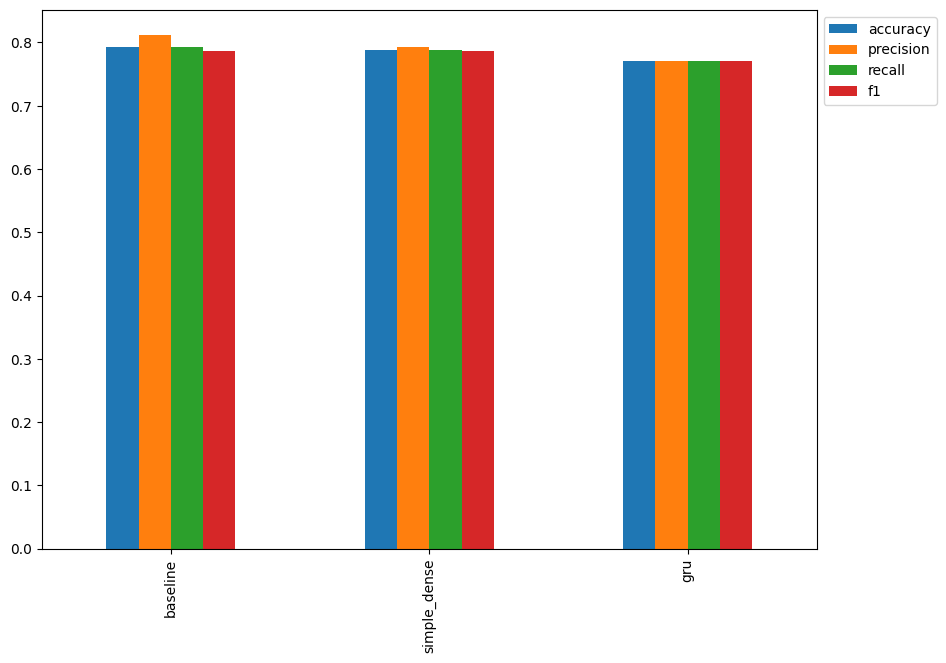

In [ ]:
# Plot and compare all of the model results
all_model_results.plot(kind='bar', figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

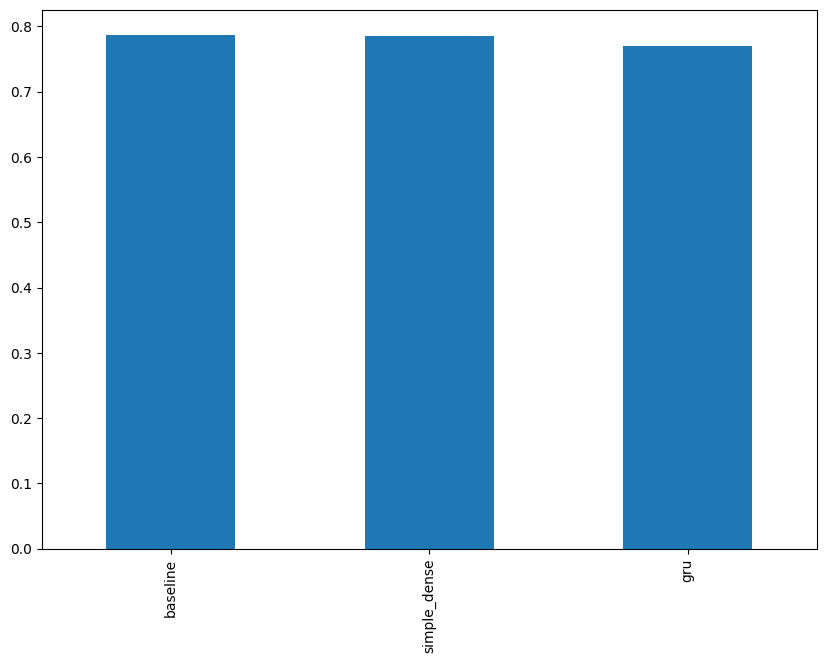

In [ ]:
all_model_results.sort_values('f1', ascending=False)['f1'].plot(kind='bar', figsize=(10, 7));

In [ ]:
# Get mean pred probs for 3 models
baseline_pred_probs = np.max(model_0.predict_proba(val_sentences), axis=1)
combined_pred_probs = baseline_pred_probs + tf.squeeze(model_8_pred_props, axis=1) + tf.squeeze(model_10_pred_props, axis=1)
combined_preds = tf.round(combined_pred_probs/3)
combined_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [ ]:
# Save TF Hub Sentence Encoder model to HDF5 format
model_10.save('model_10.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load model with custom Hub Layer (required with HDF5 format)
loaded_model_10 = tf.keras.models.load_model('model_10.h5',
                                             custom_objects={'KerasLayer': hub.KerasLayer})

In [ ]:
# How does our loaded model perform?
loaded_model_10.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 18ms/step - loss: 0.4309 - accuracy: 0.8150


[0.43092378973960876, 0.8149606585502625]

In [ ]:
# Save TF Hub Sentence Encoder model to SavedModel format (default)
model_10.save('model_6_SavedModel_format')

In [ ]:
# Load TF Hub Sentence Encoder SavedModel
loaded_model_10_SavedModel = tf.keras.models.load_model('model_6_SavedModel_format')

# Finding the most wrong examples

In [ ]:
# Create dataframe with valdiation sentences and best performing model predictions
val_df = pd.DataFrame({'text':val_sentences,
                       'target':val_labels,
                       'pred':model_10_preds,
                       'pred_prob':tf.squeeze(model_10_pred_props)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.137262
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.757530
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.986556
3,@camilacabello97 Internally and externally scr...,1,0.0,0.186813
4,Radiation emergency #preparedness starts with ...,1,1.0,0.722437


In [ ]:
# Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df['target'] != val_df['pred']].sort_values('pred_prob', ascending=False)
most_wrong[:10]

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.906697
759,FedEx will no longer transport bioterror patho...,0,1.0,0.868292
628,@noah_anyname That's where the concentration c...,0,1.0,0.848609
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.846538
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.835877
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.811040
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.810819
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.794360
698,åÈMGN-AFRICAå¨ pin:263789F4 åÈ Correction: Ten...,0,1.0,0.789198
144,The Sound of Arson,0,1.0,0.757750


In [ ]:
# Check the false positives (model predicted 1 when should've been 0)
for row in most_wrong[:10].itertuples():
  _, text, target, pred, prob = row
  print(f'Target: {target}, Pred: {int(pred)}, Prob: {prob}')
  print(f'Text: \n{text}\n')
  print('----\n')

Target: 0, Pred: 1, Prob: 0.9066974520683289
Text: 
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target: 0, Pred: 1, Prob: 0.8682920932769775
Text: 
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0, Pred: 1, Prob: 0.8486093878746033
Text: 
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target: 0, Pred: 1, Prob: 0.846537709236145
Text: 
@madonnamking RSPCA site multiple 7 story high rise buildings next to low density character residential in an area that floods

----

Target: 0, Pred: 1, Prob: 0.8358769416809082
Text: 
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

----

Target: 0, Pred: 1, Prob: 0.8110403418540955
Text: 
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----

Target: 0, Pred: 

In [ ]:
# Check the most wrong false negatives (model predicted 0 when should've been 1)
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, prob = row
  print(f'Target: {target}, Pred: {int(pred)}, Prob: {prob}')
  print(f'Text:\n{text}\n')
  print('----\n')

Target: 1, Pred: 0, Prob: 0.06149356812238693
Text:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

----

Target: 1, Pred: 0, Prob: 0.05997736006975174
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

----

Target: 1, Pred: 0, Prob: 0.059687286615371704
Text:
VICTORINOX SWISS ARMY DATE WOMEN'S RUBBER MOP WATCH 241487 http://t.co/yFy3nkkcoH http://t.co/KNEhVvOHVK

----

Target: 1, Pred: 0, Prob: 0.0586509183049202
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

Target: 1, Pred: 0, Prob: 0.049237579107284546
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

----

Target: 1, Pred: 0, Prob: 0.04506481811404228
Text:
I get to smoke my shit in peace

----

Target: 1, Pred: 0, Prob: 0.0403240658

# Making predictions on the test dataset

In [ ]:
test_sentences = test_df['text'].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_10.predict([test_sample]))     # has to be list
  pred = tf.round(pred_prob)
  print(f'Pred: {int(pred)}, Prob: {pred_prob}')
  print(f'Text:\n{test_sample}\n')
  print('----\n')

1/1 [==============================] - 0s 60ms/step
Pred: 0, Prob: 0.06834340840578079
Text:
Sleeping With Sirens - Iris (Goo Goo Dolls Cover) http://t.co/KaeWtkJ06o

----

1/1 [==============================] - 0s 63ms/step
Pred: 0, Prob: 0.49101129174232483
Text:
Dorion: Sens looking for consistency from Hoffman #ColoradoAvalanche #Avalanche http://t.co/msK68XoY7T http://t.co/ykWKx0QKtX

----

1/1 [==============================] - 0s 64ms/step
Pred: 0, Prob: 0.09033258259296417
Text:
Interview on The Collapse of Materialism Best #TalkRadio Listen Live: http://t.co/Qn8vTXZJzB

----

1/1 [==============================] - 0s 61ms/step
Pred: 1, Prob: 0.8934788107872009
Text:
@TheNerdsofColor @GeorgeTakei narrates our new doc about #Hiroshima WWII bombing and survivors tales. Check it out http://t.co/33RfRc7ZqT

----

1/1 [==============================] - 0s 57ms/step
Pred: 1, Prob: 0.9825025796890259
Text:
BBC News - MH370: Reunion debris is from missing Malaysia flight http://t.co/bz